#  ==Web Scraping And EDA project of IMDB 1000 Top Rated Movies

# Import the required package/Libaries

In [1]:
#Import the required package/Libaries
%matplotlib inline
import pandas as pd
import json
import requests
from bs4 import BeautifulSoup
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import ast,json
from datetime import datetime

# Imdb top 1000 web scrapting  data

In [2]:
#Web scraping data from web site
page = requests.get("https://www.imdb.com/search/title/?count=100&groups=top_1000&sort=user_rating")
soup = BeautifulSoup(page.text)

In [3]:
page

<Response [200]>

In [4]:
soup

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>IMDb "Top 1000"
(Sorted by IMDb Rating Descending) - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>
<link href="https://www.imdb.com/search/title/?groups=top_1000" rel="canonical"/>
<meta content="http://

# Web scraping multiple pages at a time

In [5]:
for i in range(0,10):
    burl="https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start="
    eurl="&ref_=adv_nxt"
    url=burl+str(i*100+1)+eurl
    print(url)

https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start=1&ref_=adv_nxt
https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start=101&ref_=adv_nxt
https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start=201&ref_=adv_nxt
https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start=301&ref_=adv_nxt
https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start=401&ref_=adv_nxt
https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start=501&ref_=adv_nxt
https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start=601&ref_=adv_nxt
https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start=701&ref_=adv_nxt
https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start=801&ref_=adv_nxt
https://www.imdb.com/search/title/?groups=top_10

In [6]:
movie_name = []
year = []
time = []
genre = []
rating = []
votes = []
gross = []
certificate = []
moviedirector = []
matascore = []
stars = []
for i in range(0,10):
    burl="https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start="
    eurl="&ref_=adv_nxt"
    url=burl+str(i*100+1)+eurl
    page = requests.get(url)
    soup = BeautifulSoup(page.text)
    movie_data = soup.findAll('div', attrs= {'class' : 'lister-item-content'})
    director = soup.find_all('p',class_='')
    for dire in director:
        d=dire.a.text
        moviedirector.append(d)
  #Cast
    name = soup.findAll('p',class_ = '')
    for val in name:
        s=(val.text.split('|')[1])
        stars.append(s)
   # Movie Names
    for store in movie_data:
        name = store.h3.a.text
        movie_name.append(name)
   #Year of Release
        year_of_release = store.h3.find('span' , class_= 'lister-item-year text-muted unbold').text.replace('(','').replace(')','')
        year.append(year_of_release)
   #Runtime of Movie
        time_r = store.p.find('span',class_='runtime').text.replace(' min','')
        time.append(time_r)
        
    #Censor Certificate
        certifi =store.p.find('span',class_='certificate')
        certificate.append(certifi)
   #Genre of Movies
        gen = store.p.find('span',class_='genre').text.replace(' min','').replace('\n','')
        genre.append(gen)
  #Movies Rating
        rating_mov = store.find('div', class_ = 'inline-block ratings-imdb-rating').text.replace('\n', '')
        rating.append(rating_mov)
  #Matasocre
        mata = store.find('span', class_ = 'metascore').text if store.find('span',class_ ='metascore')else "0"
        matascore.append(mata)


        value = store.find_all('span',attrs = {'name': 'nv'})
   # No of Votes per Movie
        vote = value[0].text
        votes.append(vote)
   #Gross 
        grosses=value[1].text if len(value) >1 else '0'
        gross.append(grosses)

In [7]:
len(moviedirector)

1000

# Creating Pandas Dataframe

In [8]:
movies_data = pd.DataFrame({"Movie_Names":movie_name, 
                            "Directors":moviedirector,
                            "Cast":stars,
                            "Year_of_Release":year,
                            "Duration_of_Movies":time,
                            "Gross":gross,
                            "Certificate" : certificate,
                            "Rating_for_Movies":rating,
                            "Votes": votes,
                            "Genre" : genre ,
                            "Matascore":matascore,
                           })

In [9]:
movies_data

,Movie_Names,Directors,Cast,Year_of_Release,Duration_of_Movies,Gross,Certificate,Rating_for_Movies,Votes,Genre,Matascore
0,The Shawshank Redemption,Frank Darabont,"\n Stars:\nTim Robbins, \nMorgan Freeman, ...",1994,142,$28.34M,[A],9.3,"2,459,492",Drama,80
1,The Godfather,Francis Ford Coppola,"\n Stars:\nMarlon Brando, \nAl Pacino, \nJ...",1972,175,$134.97M,[A],9.2,"1,701,479","Crime, Drama",100
2,Soorarai Pottru,Sudha Kongara,"\n Stars:\nSuriya, \nParesh Rawal, \nPraka...",2020,153,0,[U],9.1,"89,647",Drama,0
3,The Dark Knight,Christopher Nolan,"\n Stars:\nChristian Bale, \nHeath Ledger,...",2008,152,$534.86M,[UA],9.0,"2,415,060","Action, Crime, Drama",84
4,The Godfather: Part II,Francis Ford Coppola,"\n Stars:\nAl Pacino, \nRobert De Niro, \n...",1974,202,$57.30M,[A],9.0,"1,181,795","Crime, Drama",90
...,...,...,...,...,...,...,...,...,...,...,...
995,Giant,George Stevens,"\n Stars:\nElizabeth Taylor, \nRock Hudson...",1956,201,0,[U],7.6,"37,018","Drama, Western",84
996,From Here to Eternity,Fred Zinnemann,"\n Stars:\nBurt Lancaster, \nMontgomery Cl...",1953,118,$30.50M,None,7.6,"45,149","Drama, Romance, War",85
997,Gilda,Charles Vidor,"\n Stars:\nRita Hayworth, \nGlenn Ford, \n...",1946,110,0,None,7.6,"30,849","Drama, Film-Noir, Romance",0
998,Lifeboat,Alfred Hitchcock,"\n Stars:\nTallulah Bankhead, \nJohn Hodia...",1944,97,0,None,7.6,"27,731","Drama, War",78


# Saving data in csv file

In [10]:
movies_data.to_csv("movies_data.csv")

In [11]:
movies_data

,Movie_Names,Directors,Cast,Year_of_Release,Duration_of_Movies,Gross,Certificate,Rating_for_Movies,Votes,Genre,Matascore
0,The Shawshank Redemption,Frank Darabont,"\n Stars:\nTim Robbins, \nMorgan Freeman, ...",1994,142,$28.34M,[A],9.3,"2,459,492",Drama,80
1,The Godfather,Francis Ford Coppola,"\n Stars:\nMarlon Brando, \nAl Pacino, \nJ...",1972,175,$134.97M,[A],9.2,"1,701,479","Crime, Drama",100
2,Soorarai Pottru,Sudha Kongara,"\n Stars:\nSuriya, \nParesh Rawal, \nPraka...",2020,153,0,[U],9.1,"89,647",Drama,0
3,The Dark Knight,Christopher Nolan,"\n Stars:\nChristian Bale, \nHeath Ledger,...",2008,152,$534.86M,[UA],9.0,"2,415,060","Action, Crime, Drama",84
4,The Godfather: Part II,Francis Ford Coppola,"\n Stars:\nAl Pacino, \nRobert De Niro, \n...",1974,202,$57.30M,[A],9.0,"1,181,795","Crime, Drama",90
...,...,...,...,...,...,...,...,...,...,...,...
995,Giant,George Stevens,"\n Stars:\nElizabeth Taylor, \nRock Hudson...",1956,201,0,[U],7.6,"37,018","Drama, Western",84
996,From Here to Eternity,Fred Zinnemann,"\n Stars:\nBurt Lancaster, \nMontgomery Cl...",1953,118,$30.50M,None,7.6,"45,149","Drama, Romance, War",85
997,Gilda,Charles Vidor,"\n Stars:\nRita Hayworth, \nGlenn Ford, \n...",1946,110,0,None,7.6,"30,849","Drama, Film-Noir, Romance",0
998,Lifeboat,Alfred Hitchcock,"\n Stars:\nTallulah Bankhead, \nJohn Hodia...",1944,97,0,None,7.6,"27,731","Drama, War",78


# Data cleaing

In [12]:
#Data cleaing
#1) remove duplicate columns/rows
#2) check if any movies have 0 gross/matascore
#3) remove unneccary \n and soon

# Columns names

In [13]:
movies_data.columns

Index(['Movie_Names', 'Directors', 'Cast', 'Year_of_Release',
       'Duration_of_Movies', 'Gross', 'Certificate', 'Rating_for_Movies',
       'Votes', 'Genre', 'Matascore'],
      dtype='object')

In [14]:
movies_data.head(15)

,Movie_Names,Directors,Cast,Year_of_Release,Duration_of_Movies,Gross,Certificate,Rating_for_Movies,Votes,Genre,Matascore
0,The Shawshank Redemption,Frank Darabont,"\n Stars:\nTim Robbins, \nMorgan Freeman, ...",1994,142,$28.34M,[A],9.3,"2,459,492",Drama,80
1,The Godfather,Francis Ford Coppola,"\n Stars:\nMarlon Brando, \nAl Pacino, \nJ...",1972,175,$134.97M,[A],9.2,"1,701,479","Crime, Drama",100
2,Soorarai Pottru,Sudha Kongara,"\n Stars:\nSuriya, \nParesh Rawal, \nPraka...",2020,153,0,[U],9.1,"89,647",Drama,0
3,The Dark Knight,Christopher Nolan,"\n Stars:\nChristian Bale, \nHeath Ledger,...",2008,152,$534.86M,[UA],9.0,"2,415,060","Action, Crime, Drama",84
4,The Godfather: Part II,Francis Ford Coppola,"\n Stars:\nAl Pacino, \nRobert De Niro, \n...",1974,202,$57.30M,[A],9.0,"1,181,795","Crime, Drama",90
5,12 Angry Men,Sidney Lumet,"\n Stars:\nHenry Fonda, \nLee J. Cobb, \nM...",1957,96,$4.36M,[U],9.0,"728,136","Crime, Drama",96
6,Dara iz Jasenovca,Predrag Antonijevic,"\n Stars:\nBiljana Cekic, \nZlatan Vidovic...",2020,130,0,[R],8.9,"79,154","Drama, War",0
7,The Lord of the Rings: The Return of the King,Peter Jackson,"\n Stars:\nElijah Wood, \nViggo Mortensen,...",2003,201,$377.85M,[U],8.9,"1,707,252","Action, Adventure, Drama",94
8,Pulp Fiction,Quentin Tarantino,"\n Stars:\nJohn Travolta, \nUma Thurman, \...",1994,154,$107.93M,[A],8.9,"1,905,503","Crime, Drama",94
9,Schindler's List,Steven Spielberg,"\n Stars:\nLiam Neeson, \nRalph Fiennes, \...",1993,195,$96.90M,[A],8.9,"1,264,563","Biography, Drama, History",94


In [15]:
#Removing \n in Names
movies_data['Cast']=movies_data['Cast'].str.replace(r"[\n:]",'')

<ipython-input-15-890bf350bcbf>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  movies_data['Cast']=movies_data['Cast'].str.replace(r"[\n:]",'')


In [16]:
movies_data

,Movie_Names,Directors,Cast,Year_of_Release,Duration_of_Movies,Gross,Certificate,Rating_for_Movies,Votes,Genre,Matascore
0,The Shawshank Redemption,Frank Darabont,"StarsTim Robbins, Morgan Freeman, Bob Gun...",1994,142,$28.34M,[A],9.3,"2,459,492",Drama,80
1,The Godfather,Francis Ford Coppola,"StarsMarlon Brando, Al Pacino, James Caan...",1972,175,$134.97M,[A],9.2,"1,701,479","Crime, Drama",100
2,Soorarai Pottru,Sudha Kongara,"StarsSuriya, Paresh Rawal, Prakash Belawa...",2020,153,0,[U],9.1,"89,647",Drama,0
3,The Dark Knight,Christopher Nolan,"StarsChristian Bale, Heath Ledger, Aaron ...",2008,152,$534.86M,[UA],9.0,"2,415,060","Action, Crime, Drama",84
4,The Godfather: Part II,Francis Ford Coppola,"StarsAl Pacino, Robert De Niro, Robert Du...",1974,202,$57.30M,[A],9.0,"1,181,795","Crime, Drama",90
...,...,...,...,...,...,...,...,...,...,...,...
995,Giant,George Stevens,"StarsElizabeth Taylor, Rock Hudson, James...",1956,201,0,[U],7.6,"37,018","Drama, Western",84
996,From Here to Eternity,Fred Zinnemann,"StarsBurt Lancaster, Montgomery Clift, De...",1953,118,$30.50M,None,7.6,"45,149","Drama, Romance, War",85
997,Gilda,Charles Vidor,"StarsRita Hayworth, Glenn Ford, George Ma...",1946,110,0,None,7.6,"30,849","Drama, Film-Noir, Romance",0
998,Lifeboat,Alfred Hitchcock,"StarsTallulah Bankhead, John Hodiak, Walt...",1944,97,0,None,7.6,"27,731","Drama, War",78


In [17]:
movies_data['Year_of_Release'].unique()

array(['1994', '1972', '2020', '2008', '1974', '1957', '2003', '1993',
       '2010', '2021', '1999', '2001', '1966', '2002', '1990', '1980',
       '1975', '2019', '2014', '1998', '1997', '1995', '1991', '1977',
       '1962', '1954', '1946', '2018', '2011', '2006', '2000', '1988',
       '1985', '1968', '1960', '1955', '1942', '1936', '1931', '2017',
       '2016', 'I 2017', '2012', '2009', '2007', '1984', '1981', '1979',
       '1963', '1964', '1950', '1940', '2013', 'I 2020', '2005', '2004',
       '1992', '1987', '1986', '1983', '1973', '1971', '1959', '1958',
       '1952', '1948', '1944', '1941', '1927', '1921', '2015', '1996',
       '1989', '1978', '1976', '1965', '1961', '1953', '1925', '1924',
       'III 2016', 'I 2014', 'I 2015', 'I 2013', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1930', '1928', '1926', '1920',
       'I 2004', '1970', '1969', '1956', '1947', '1945', '1943',
       'II 2016', 'I 2011', 'I 2001', '1938', '1935', '1933', '1932',
       

# Removing unneccary data in Year

In [18]:
Year=[]
for i in movies_data['Year_of_Release']:
    if "I" in i:
        Year.append(i.replace("I",''))
    else:
        Year.append(i)

In [19]:
Year=pd.Series(Year)
Year.unique()

array(['1994', '1972', '2020', '2008', '1974', '1957', '2003', '1993',
       '2010', '2021', '1999', '2001', '1966', '2002', '1990', '1980',
       '1975', '2019', '2014', '1998', '1997', '1995', '1991', '1977',
       '1962', '1954', '1946', '2018', '2011', '2006', '2000', '1988',
       '1985', '1968', '1960', '1955', '1942', '1936', '1931', '2017',
       '2016', ' 2017', '2012', '2009', '2007', '1984', '1981', '1979',
       '1963', '1964', '1950', '1940', '2013', ' 2020', '2005', '2004',
       '1992', '1987', '1986', '1983', '1973', '1971', '1959', '1958',
       '1952', '1948', '1944', '1941', '1927', '1921', '2015', '1996',
       '1989', '1978', '1976', '1965', '1961', '1953', '1925', '1924',
       ' 2016', ' 2014', ' 2015', ' 2013', '1982', '1967', '1951', '1949',
       '1939', '1937', '1934', '1930', '1928', '1926', '1920', ' 2004',
       '1970', '1969', '1956', '1947', '1945', '1943', ' 2011', ' 2001',
       '1938', '1935', '1933', '1932', '1922', ' 2010', ' 2008', ' 2

In [20]:
movies_data[ "Year_Release"] = Year

In [21]:
movies_data.drop('Year_of_Release', axis=1, inplace=True)

# Reindex the Columns

In [22]:
movies_data = movies_data.reindex(['Movie_Names','Directors','Cast','Year_Release','Duration_of_Movies','Gross','Certificate','Rating_for_Movies','Votes','Genre','Matascore'], axis=1)

In [23]:
movies_data.head(4)

,Movie_Names,Directors,Cast,Year_Release,Duration_of_Movies,Gross,Certificate,Rating_for_Movies,Votes,Genre,Matascore
0,The Shawshank Redemption,Frank Darabont,"StarsTim Robbins, Morgan Freeman, Bob Gun...",1994,142,$28.34M,[A],9.3,"2,459,492",Drama,80
1,The Godfather,Francis Ford Coppola,"StarsMarlon Brando, Al Pacino, James Caan...",1972,175,$134.97M,[A],9.2,"1,701,479","Crime, Drama",100
2,Soorarai Pottru,Sudha Kongara,"StarsSuriya, Paresh Rawal, Prakash Belawa...",2020,153,0,[U],9.1,"89,647",Drama,0
3,The Dark Knight,Christopher Nolan,"StarsChristian Bale, Heath Ledger, Aaron ...",2008,152,$534.86M,[UA],9.0,"2,415,060","Action, Crime, Drama",84


# Changing datetype of Year_Release

In [24]:
movies_data['Year_Release'] = movies_data['Year_Release'].astype('int')

In [25]:
movies_data['Votes']=movies_data['Votes'].str.replace(r"[,]",'')

<ipython-input-25-fbb45af07862>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  movies_data['Votes']=movies_data['Votes'].str.replace(r"[,]",'')


#  Changing datetype of Votes

In [26]:
movies_data['Votes'] = movies_data['Votes'].astype('int')

SyntaxError: invalid syntax (<ipython-input-3-f488cec54fd1>, line 1)

# Remove Unnecessary data in Gross column

In [27]:
Gross=[]
for i in movies_data['Gross']:
    if "M" in i:
        Gross.append(i.replace("M",''))
    else:
        Gross.append(i)

In [28]:
movies_data['Gross']=movies_data['Gross'].str.replace(r"[$]",'').replace(r"[M]",'')

<ipython-input-28-d1ffb710aeb8>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  movies_data['Gross']=movies_data['Gross'].str.replace(r"[$]",'').replace(r"[M]",'')


In [29]:
movies_data['Gross']=movies_data['Gross'].str.replace(r"[M]",'')

<ipython-input-29-2a982f0c5b5d>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  movies_data['Gross']=movies_data['Gross'].str.replace(r"[M]",'')


In [30]:
movies_data

,Movie_Names,Directors,Cast,Year_Release,Duration_of_Movies,Gross,Certificate,Rating_for_Movies,Votes,Genre,Matascore
0,The Shawshank Redemption,Frank Darabont,"StarsTim Robbins, Morgan Freeman, Bob Gun...",1994,142,28.34,[A],9.3,2459492,Drama,80
1,The Godfather,Francis Ford Coppola,"StarsMarlon Brando, Al Pacino, James Caan...",1972,175,134.97,[A],9.2,1701479,"Crime, Drama",100
2,Soorarai Pottru,Sudha Kongara,"StarsSuriya, Paresh Rawal, Prakash Belawa...",2020,153,0,[U],9.1,89647,Drama,0
3,The Dark Knight,Christopher Nolan,"StarsChristian Bale, Heath Ledger, Aaron ...",2008,152,534.86,[UA],9.0,2415060,"Action, Crime, Drama",84
4,The Godfather: Part II,Francis Ford Coppola,"StarsAl Pacino, Robert De Niro, Robert Du...",1974,202,57.30,[A],9.0,1181795,"Crime, Drama",90
...,...,...,...,...,...,...,...,...,...,...,...
995,Giant,George Stevens,"StarsElizabeth Taylor, Rock Hudson, James...",1956,201,0,[U],7.6,37018,"Drama, Western",84
996,From Here to Eternity,Fred Zinnemann,"StarsBurt Lancaster, Montgomery Clift, De...",1953,118,30.50,None,7.6,45149,"Drama, Romance, War",85
997,Gilda,Charles Vidor,"StarsRita Hayworth, Glenn Ford, George Ma...",1946,110,0,None,7.6,30849,"Drama, Film-Noir, Romance",0
998,Lifeboat,Alfred Hitchcock,"StarsTallulah Bankhead, John Hodiak, Walt...",1944,97,0,None,7.6,27731,"Drama, War",78


# Changing datetype of Gross

In [31]:
movies_data['Gross'] = movies_data['Gross'].astype('float')

In [32]:
Year.unique()

array(['1994', '1972', '2020', '2008', '1974', '1957', '2003', '1993',
       '2010', '2021', '1999', '2001', '1966', '2002', '1990', '1980',
       '1975', '2019', '2014', '1998', '1997', '1995', '1991', '1977',
       '1962', '1954', '1946', '2018', '2011', '2006', '2000', '1988',
       '1985', '1968', '1960', '1955', '1942', '1936', '1931', '2017',
       '2016', ' 2017', '2012', '2009', '2007', '1984', '1981', '1979',
       '1963', '1964', '1950', '1940', '2013', ' 2020', '2005', '2004',
       '1992', '1987', '1986', '1983', '1973', '1971', '1959', '1958',
       '1952', '1948', '1944', '1941', '1927', '1921', '2015', '1996',
       '1989', '1978', '1976', '1965', '1961', '1953', '1925', '1924',
       ' 2016', ' 2014', ' 2015', ' 2013', '1982', '1967', '1951', '1949',
       '1939', '1937', '1934', '1930', '1928', '1926', '1920', ' 2004',
       '1970', '1969', '1956', '1947', '1945', '1943', ' 2011', ' 2001',
       '1938', '1935', '1933', '1932', '1922', ' 2010', ' 2008', ' 2

# Changing datetype of Rating_for_Movies

In [33]:
movies_data['Rating_for_Movies'] =movies_data['Rating_for_Movies'].astype('float')

# Changing datetype of Duration_of_Movies

In [34]:
movies_data['Duration_of_Movies'] = movies_data['Duration_of_Movies'].astype('int')

# Changing datetype of Matascore

In [35]:
movies_data['Matascore'] = movies_data['Matascore'].astype('int')

# Information and Datatypes of movies_data

In [36]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Movie_Names         1000 non-null   object 
 1   Directors           1000 non-null   object 
 2   Cast                1000 non-null   object 
 3   Year_Release        1000 non-null   int32  
 4   Duration_of_Movies  1000 non-null   int32  
 5   Gross               1000 non-null   float64
 6   Certificate         842 non-null    object 
 7   Rating_for_Movies   1000 non-null   float64
 8   Votes               1000 non-null   int32  
 9   Genre               1000 non-null   object 
 10  Matascore           1000 non-null   int32  
dtypes: float64(2), int32(4), object(5)
memory usage: 70.4+ KB


# Converting nun as 0

In [37]:
movies_data.fillna(0)

,Movie_Names,Directors,Cast,Year_Release,Duration_of_Movies,Gross,Certificate,Rating_for_Movies,Votes,Genre,Matascore
0,The Shawshank Redemption,Frank Darabont,"StarsTim Robbins, Morgan Freeman, Bob Gun...",1994,142,28.34,[A],9.3,2459492,Drama,80
1,The Godfather,Francis Ford Coppola,"StarsMarlon Brando, Al Pacino, James Caan...",1972,175,134.97,[A],9.2,1701479,"Crime, Drama",100
2,Soorarai Pottru,Sudha Kongara,"StarsSuriya, Paresh Rawal, Prakash Belawa...",2020,153,0.00,[U],9.1,89647,Drama,0
3,The Dark Knight,Christopher Nolan,"StarsChristian Bale, Heath Ledger, Aaron ...",2008,152,534.86,[UA],9.0,2415060,"Action, Crime, Drama",84
4,The Godfather: Part II,Francis Ford Coppola,"StarsAl Pacino, Robert De Niro, Robert Du...",1974,202,57.30,[A],9.0,1181795,"Crime, Drama",90
...,...,...,...,...,...,...,...,...,...,...,...
995,Giant,George Stevens,"StarsElizabeth Taylor, Rock Hudson, James...",1956,201,0.00,[U],7.6,37018,"Drama, Western",84
996,From Here to Eternity,Fred Zinnemann,"StarsBurt Lancaster, Montgomery Clift, De...",1953,118,30.50,0,7.6,45149,"Drama, Romance, War",85
997,Gilda,Charles Vidor,"StarsRita Hayworth, Glenn Ford, George Ma...",1946,110,0.00,0,7.6,30849,"Drama, Film-Noir, Romance",0
998,Lifeboat,Alfred Hitchcock,"StarsTallulah Bankhead, John Hodiak, Walt...",1944,97,0.00,0,7.6,27731,"Drama, War",78


# Data Processing for EDA:

In [38]:
movies_data.columns = map(str.lower, movies_data.columns)
movies_data.columns

Index(['movie_names', 'directors', 'cast', 'year_release',
       'duration_of_movies', 'gross', 'certificate', 'rating_for_movies',
       'votes', 'genre', 'matascore'],
      dtype='object')

In [39]:
movies_data

,movie_names,directors,cast,year_release,duration_of_movies,gross,certificate,rating_for_movies,votes,genre,matascore
0,The Shawshank Redemption,Frank Darabont,"StarsTim Robbins, Morgan Freeman, Bob Gun...",1994,142,28.34,[A],9.3,2459492,Drama,80
1,The Godfather,Francis Ford Coppola,"StarsMarlon Brando, Al Pacino, James Caan...",1972,175,134.97,[A],9.2,1701479,"Crime, Drama",100
2,Soorarai Pottru,Sudha Kongara,"StarsSuriya, Paresh Rawal, Prakash Belawa...",2020,153,0.00,[U],9.1,89647,Drama,0
3,The Dark Knight,Christopher Nolan,"StarsChristian Bale, Heath Ledger, Aaron ...",2008,152,534.86,[UA],9.0,2415060,"Action, Crime, Drama",84
4,The Godfather: Part II,Francis Ford Coppola,"StarsAl Pacino, Robert De Niro, Robert Du...",1974,202,57.30,[A],9.0,1181795,"Crime, Drama",90
...,...,...,...,...,...,...,...,...,...,...,...
995,Giant,George Stevens,"StarsElizabeth Taylor, Rock Hudson, James...",1956,201,0.00,[U],7.6,37018,"Drama, Western",84
996,From Here to Eternity,Fred Zinnemann,"StarsBurt Lancaster, Montgomery Clift, De...",1953,118,30.50,None,7.6,45149,"Drama, Romance, War",85
997,Gilda,Charles Vidor,"StarsRita Hayworth, Glenn Ford, George Ma...",1946,110,0.00,None,7.6,30849,"Drama, Film-Noir, Romance",0
998,Lifeboat,Alfred Hitchcock,"StarsTallulah Bankhead, John Hodiak, Walt...",1944,97,0.00,None,7.6,27731,"Drama, War",78


In [40]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_names         1000 non-null   object 
 1   directors           1000 non-null   object 
 2   cast                1000 non-null   object 
 3   year_release        1000 non-null   int32  
 4   duration_of_movies  1000 non-null   int32  
 5   gross               1000 non-null   float64
 6   certificate         842 non-null    object 
 7   rating_for_movies   1000 non-null   float64
 8   votes               1000 non-null   int32  
 9   genre               1000 non-null   object 
 10  matascore           1000 non-null   int32  
dtypes: float64(2), int32(4), object(5)
memory usage: 70.4+ KB


In [41]:
movies_data.sort_values(by = 'gross',ascending=False, inplace=True)

# Describe of movies_data

In [42]:
movies_data.describe()

,year_release,duration_of_movies,gross,rating_for_movies,votes,matascore
count,1000.000000,1000.000000,1000.000000,1000.0000,1.000000e+03,1000.000000
mean,1991.288000,123.183000,55.601550,7.9593,2.839735e+05,65.623000
std,23.523614,28.367132,103.290904,0.2783,3.426561e+05,30.874717
min,1920.000000,45.000000,0.000000,7.6000,2.531800e+04,0.000000
25%,1976.000000,103.000000,0.310000,7.7000,5.659200e+04,63.000000
50%,1999.000000,119.000000,9.455000,7.9000,1.361100e+05,76.000000
75%,2010.000000,137.000000,59.777500,8.1000,3.902870e+05,86.000000
max,2021.000000,321.000000,936.660000,9.3000,2.459492e+06,100.000000


# Unique year_release

In [43]:
movies_data.year_release.unique()

array([2015, 2019, 2009, 2018, 1997, 2012, 2008, 2016, 1982, 1994, 2010,
       1993, 2017, 2011, 2003, 2002, 2014, 1977, 2001, 1983, 1999, 1980,
       2005, 1990, 2013, 2004, 1975, 1981, 1984, 2000, 1973, 2007, 1991,
       1992, 1998, 1985, 2006, 1939, 1989, 1995, 1988, 1965, 1967, 1986,
       1972, 1974, 1976, 1979, 1969, 1964, 1956, 1971, 1940, 1987, 1959,
       1970, 1968, 1996, 1978, 2020, 1957, 1962, 1954, 1960, 1953, 1966,
       1946, 1958, 1963, 1948, 1952, 1933, 1945, 1961, 1951, 1944, 1925,
       1921, 1935, 1934, 1938, 1930, 1947, 1941, 1927, 1926, 1942, 1924,
       1955, 1949, 1937, 1936, 1950, 1931, 1928, 2021, 1920, 1943, 1932,
       1922])

# Top Gross movies

In [44]:
gross_movies_df=movies_data.sort_values(by="gross",ascending=False).head(10)
gross_movies_df

,movie_names,directors,cast,year_release,duration_of_movies,gross,certificate,rating_for_movies,votes,genre,matascore
603,Star Wars: Episode VII - The Force Awakens,J.J. Abrams,"StarsDaisy Ridley, John Boyega, Oscar Isa...",2015,138,936.66,[U],7.8,884105,"Action, Adventure, Sci-Fi",80
64,Avengers: Endgame,Anthony Russo,"StarsRobert Downey Jr., Chris Evans, Mark...",2019,181,858.37,[UA],8.4,935155,"Action, Adventure, Drama",78
639,Avatar,James Cameron,"StarsSam Worthington, Zoe Saldana, Sigour...",2009,162,760.51,[UA],7.8,1154717,"Action, Adventure, Fantasy",83
65,Avengers: Infinity War,Anthony Russo,"StarsRobert Downey Jr., Chris Hemsworth, ...",2018,149,678.82,[UA],8.4,921232,"Action, Adventure, Sci-Fi",68
665,Titanic,James Cameron,"StarsLeonardo DiCaprio, Kate Winslet, Bil...",1997,194,659.33,[UA],7.8,1090960,"Drama, Romance",75
370,The Avengers,Joss Whedon,"StarsRobert Downey Jr., Chris Evans, Scar...",2012,143,623.28,[UA],8.0,1306454,"Action, Adventure, Sci-Fi",69
908,Incredibles 2,Brad Bird,"StarsCraig T. Nelson, Holly Hunter, Sarah...",2018,118,608.58,[UA],7.6,268305,"Animation, Action, Adventure",80
3,The Dark Knight,Christopher Nolan,"StarsChristian Bale, Heath Ledger, Aaron ...",2008,152,534.86,[UA],9.0,2415060,"Action, Crime, Drama",84
596,Rogue One,Gareth Edwards,"StarsFelicity Jones, Diego Luna, Alan Tud...",2016,133,532.18,[UA],7.8,579403,"Action, Adventure, Sci-Fi",65
68,The Dark Knight Rises,Christopher Nolan,"StarsChristian Bale, Tom Hardy, Anne Hath...",2012,164,448.14,[UA],8.4,1575682,"Action, Adventure",78


# Less gross movies

In [45]:
#Less Gross Movies
lessgross = movies_data.sort_values(by ='gross', ascending=True).head()
lessgross

,movie_names,directors,cast,year_release,duration_of_movies,gross,certificate,rating_for_movies,votes,genre,matascore
999,The 39 Steps,Alfred Hitchcock,"StarsRobert Donat, Madeleine Carroll, Luc...",1935,86,0.0,None,7.6,54442,"Crime, Mystery, Thriller",93
986,Watership Down,Martin Rosen,"StarsJohn Hurt, Richard Briers, Ralph Ric...",1978,91,0.0,[U],7.6,35129,"Animation, Adventure, Drama",64
478,Hindi Medium,Saket Chaudhary,"StarsIrrfan Khan, Saba Qamar, Dishita Seh...",2017,132,0.0,[U],7.9,25903,"Comedy, Drama",0
467,Brief Encounter,David Lean,"StarsCelia Johnson, Trevor Howard, Stanle...",1945,86,0.0,[U],8.0,37998,"Drama, Romance",92
464,Rope,Alfred Hitchcock,"StarsJames Stewart, John Dall, Farley Gra...",1948,80,0.0,[A],8.0,135825,"Crime, Drama, Mystery",73


# Top Rated Movie

In [46]:
#Top Rated Movies
rating_movies_df=movies_data.sort_values(by="rating_for_movies",ascending=False).head()
rating_movies_df

,movie_names,directors,cast,year_release,duration_of_movies,gross,certificate,rating_for_movies,votes,genre,matascore
0,The Shawshank Redemption,Frank Darabont,"StarsTim Robbins, Morgan Freeman, Bob Gun...",1994,142,28.34,[A],9.3,2459492,Drama,80
1,The Godfather,Francis Ford Coppola,"StarsMarlon Brando, Al Pacino, James Caan...",1972,175,134.97,[A],9.2,1701479,"Crime, Drama",100
2,Soorarai Pottru,Sudha Kongara,"StarsSuriya, Paresh Rawal, Prakash Belawa...",2020,153,0.00,[U],9.1,89647,Drama,0
4,The Godfather: Part II,Francis Ford Coppola,"StarsAl Pacino, Robert De Niro, Robert Du...",1974,202,57.30,[A],9.0,1181795,"Crime, Drama",90
3,The Dark Knight,Christopher Nolan,"StarsChristian Bale, Heath Ledger, Aaron ...",2008,152,534.86,[UA],9.0,2415060,"Action, Crime, Drama",84


# Low Rated Movie

In [47]:
#Low Rated Movies
rating_movies_df=movies_data.sort_values(by="rating_for_movies",ascending=True).head()
rating_movies_df

,movie_names,directors,cast,year_release,duration_of_movies,gross,certificate,rating_for_movies,votes,genre,matascore
999,The 39 Steps,Alfred Hitchcock,"StarsRobert Donat, Madeleine Carroll, Luc...",1935,86,0.00,None,7.6,54442,"Crime, Mystery, Thriller",93
976,When Harry Met Sally...,Rob Reiner,"StarsBilly Crystal, Meg Ryan, Carrie Fish...",1989,95,92.82,[UA],7.6,205267,"Comedy, Drama, Romance",76
903,The Peanut Butter Falcon,Tyler Nilson,"StarsZack Gottsagen, Ann Owens, Dakota Jo...",2019,97,13.12,[16],7.6,81732,"Adventure, Comedy, Drama",70
950,25th Hour,Spike Lee,"StarsEdward Norton, Barry Pepper, Philip ...",2002,135,13.06,[R],7.6,174554,Drama,68
981,Mad Max 2,George Miller,"StarsMel Gibson, Bruce Spence, Michael Pr...",1981,96,12.47,[UA],7.6,172246,"Action, Adventure, Sci-Fi",77


In [48]:
#Functions To Find Minimum and Maximum
def find_min_max_in(col):
    
    top = movies_data[col].idxmax()
    top_df = pd.DataFrame(movies_data.loc[top])
    
    bottom = movies_data[col].idxmin()
    bottom_df = pd.DataFrame(movies_data.loc[bottom])
    
    info_df = pd.concat([top_df, bottom_df], axis=1)
    return info_df

# min and max in rating of movies

In [49]:
#Minimum and Maximum Rating
find_min_max_in('rating_for_movies')

,0,908
movie_names,The Shawshank Redemption,Incredibles 2
directors,Frank Darabont,Brad Bird
cast,"StarsTim Robbins, Morgan Freeman, Bob Gun...","StarsCraig T. Nelson, Holly Hunter, Sarah..."
year_release,1994,2018
duration_of_movies,142,118
gross,28.34,608.58
certificate,[A],[UA]
rating_for_movies,9.3,7.6
votes,2459492,268305
genre,Drama,"Animation, Action, Adventure"


In [50]:
find_min_max_in('votes')

,0,585
movie_names,The Shawshank Redemption,Badla
directors,Frank Darabont,Sujoy Ghosh
cast,"StarsTim Robbins, Morgan Freeman, Bob Gun...","StarsAmitabh Bachchan, Taapsee Pannu, Amr..."
year_release,1994,2019
duration_of_movies,142,118
gross,28.34,0.0
certificate,[A],[UA]
rating_for_movies,9.3,7.8
votes,2459492,25318
genre,Drama,"Crime, Drama, Mystery"


In [51]:
#Minimum and Maximum time of movie
find_min_max_in('duration_of_movies')

,145,199
movie_names,Gangs of Wasseypur,Sherlock Jr.
directors,Anurag Kashyap,Buster Keaton
cast,"StarsManoj Bajpayee, Richa Chadha, Nawazu...","StarsBuster Keaton, Kathryn McGuire, Joe ..."
year_release,2012,1924
duration_of_movies,321,45
gross,0.0,0.98
certificate,[A],None
rating_for_movies,8.2,8.2
votes,89486,45774
genre,"Action, Crime, Drama","Action, Comedy, Romance"


In [52]:
#Mean Run time of Movies
movies_data['duration_of_movies'].mean()

123.183

In [53]:
#Max Run time of Movies
movies_data['duration_of_movies'].max()

321

# Performing Analysis:

# High Gross movie in Data

In [54]:
movies_data.sort_values(by = 'gross',ascending=False).iloc[0,0]

'Star Wars: Episode VII - The Force Awakens'

# Movie got Low Votes

In [55]:
movies_data.sort_values(by = 'votes',ascending=False).iloc[0,0]

'The Shawshank Redemption'

# How many movies directed by Alfred Hitchcock

In [56]:
# Know how many movies directed by same director
movies_data[movies_data['directors'] == "Alfred Hitchcock"]

,movie_names,directors,cast,year_release,duration_of_movies,gross,certificate,rating_for_movies,votes,genre,matascore
53,Rear Window,Alfred Hitchcock,"StarsJames Stewart, Grace Kelly, Wendell ...",1954,112,36.76,[U],8.5,464525,"Mystery, Thriller",100
51,Psycho,Alfred Hitchcock,"StarsAnthony Perkins, Janet Leigh, Vera M...",1960,109,32.00,[A],8.5,629464,"Horror, Mystery, Thriller",97
124,North by Northwest,Alfred Hitchcock,"StarsCary Grant, Eva Marie Saint, James M...",1959,136,13.28,[U],8.3,311741,"Adventure, Mystery, Thriller",98
882,The Birds,Alfred Hitchcock,"StarsRod Taylor, Tippi Hedren, Jessica Ta...",1963,119,11.40,[A],7.7,178859,"Drama, Horror, Mystery",90
466,Notorious,Alfred Hitchcock,"StarsCary Grant, Ingrid Bergman, Claude R...",1946,102,10.46,[U],8.0,97148,"Drama, Film-Noir, Romance",100
461,Strangers on a Train,Alfred Hitchcock,"StarsFarley Granger, Robert Walker, Ruth ...",1951,101,7.63,[A],8.0,129120,"Crime, Film-Noir, Thriller",88
325,Rebecca,Alfred Hitchcock,"StarsLaurence Olivier, Joan Fontaine, Geo...",1940,130,4.36,None,8.1,130842,"Drama, Mystery, Romance",86
125,Vertigo,Alfred Hitchcock,"StarsJames Stewart, Kim Novak, Barbara Be...",1958,128,3.20,[A],8.3,381513,"Mystery, Romance, Thriller",100
192,Dial M for Murder,Alfred Hitchcock,"StarsRay Milland, Grace Kelly, Robert Cum...",1954,105,0.01,[A],8.2,166388,"Crime, Thriller",75
998,Lifeboat,Alfred Hitchcock,"StarsTallulah Bankhead, John Hodiak, Walt...",1944,97,0.00,None,7.6,27731,"Drama, War",78


# How many movies directed by Christopher Nolan

In [57]:
movies_data[movies_data['directors'] == "Christopher Nolan"]

,movie_names,directors,cast,year_release,duration_of_movies,gross,certificate,rating_for_movies,votes,genre,matascore
3,The Dark Knight,Christopher Nolan,"StarsChristian Bale, Heath Ledger, Aaron ...",2008,152,534.86,[UA],9.0,2415060,"Action, Crime, Drama",84
68,The Dark Knight Rises,Christopher Nolan,"StarsChristian Bale, Tom Hardy, Anne Hath...",2012,164,448.14,[UA],8.4,1575682,"Action, Adventure",78
10,Inception,Christopher Nolan,"StarsLeonardo DiCaprio, Joseph Gordon-Lev...",2010,148,292.58,[UA],8.8,2166627,"Action, Adventure, Sci-Fi",74
160,Batman Begins,Christopher Nolan,"StarsChristian Bale, Michael Caine, Ken W...",2005,140,206.85,[UA],8.2,1358248,"Action, Adventure",70
588,Dunkirk,Christopher Nolan,"StarsFionn Whitehead, Barry Keoghan, Mark...",2017,106,188.37,[UA],7.8,593856,"Action, Drama, History",94
23,Interstellar,Christopher Nolan,"StarsMatthew McConaughey, Anne Hathaway, ...",2014,169,188.02,[UA],8.6,1611175,"Adventure, Drama, Sci-Fi",74
38,The Prestige,Christopher Nolan,"StarsChristian Bale, Hugh Jackman, Scarle...",2006,130,53.09,[U],8.5,1242968,"Drama, Mystery, Sci-Fi",66
74,Memento,Christopher Nolan,"StarsGuy Pearce, Carrie-Anne Moss, Joe Pa...",2000,113,25.54,[UA],8.4,1167694,"Mystery, Thriller",80


# Data about Genre which got most rating

In [58]:
movies_data.groupby(['genre'])['rating_for_movies'].value_counts().sort_values(ascending=False)

genre                                     rating_for_movies
Drama                                     8.0                  17
                                          7.7                  13
                                          8.1                  12
                                          7.8                   9
Animation, Adventure, Comedy              7.7                   9
                                                               ..
Animation, Drama, Romance                 7.6                   1
Animation, Drama, Fantasy                 8.4                   1
                                          8.1                   1
                                          7.9                   1
Western                                   8.8                   1
Name: rating_for_movies, Length: 590, dtype: int64

In [59]:
movies_data.groupby(['year_release','votes'])['rating_for_movies'].count().head(25)

year_release  votes 
1920          60166     1
1921          119897    1
1922          92130     1
1924          45774     1
1925          55368     1
              106272    1
1926          86654     1
1927          49435     1
              166509    1
1928          32149     1
              51249     1
1930          59288     1
1931          68172     1
              150288    1
              175670    1
1932          26719     1
              43891     1
1933          32432     1
              58649     1
              82406     1
1934          28019     1
              98649     1
1935          31774     1
              45546     1
              54442     1
Name: rating_for_movies, dtype: int64

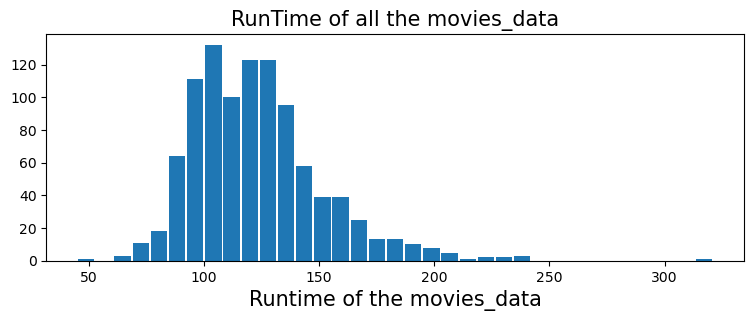

In [60]:
plt.figure(figsize=(9,3), dpi = 100)

#On x-axis 
plt.xlabel('Runtime of the movies_data', fontsize = 15)

#Name of the graph
plt.title('RunTime of all the movies_data', fontsize=15)

#giving a histogram plot
plt.hist(movies_data['duration_of_movies'], rwidth = 0.9, bins =35)
#displays the plot
plt.show()

# No of Movies directed b y Director

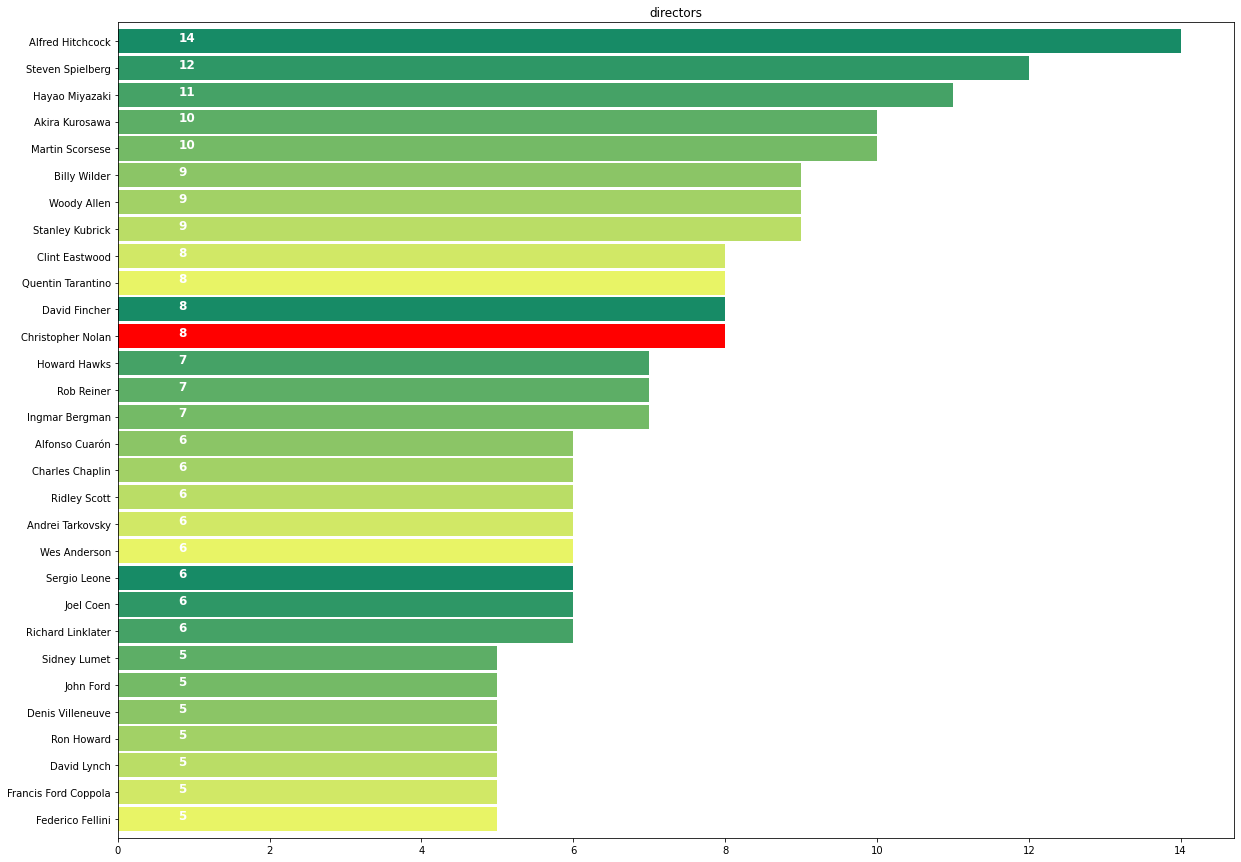

In [61]:
movies_data['directors']=movies_data['directors'].str.strip('[]').str.replace("'",'')
movies_data['directors']=movies_data['directors'].str.split(',')
plt.subplots(figsize=(20,15))
list1=[]
for i in movies_data['directors']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:30].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('summer_r',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:30].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
ax.patches[18].set_facecolor('r')
plt.title('directors')
plt.show()

# Actors who are cast in More movies

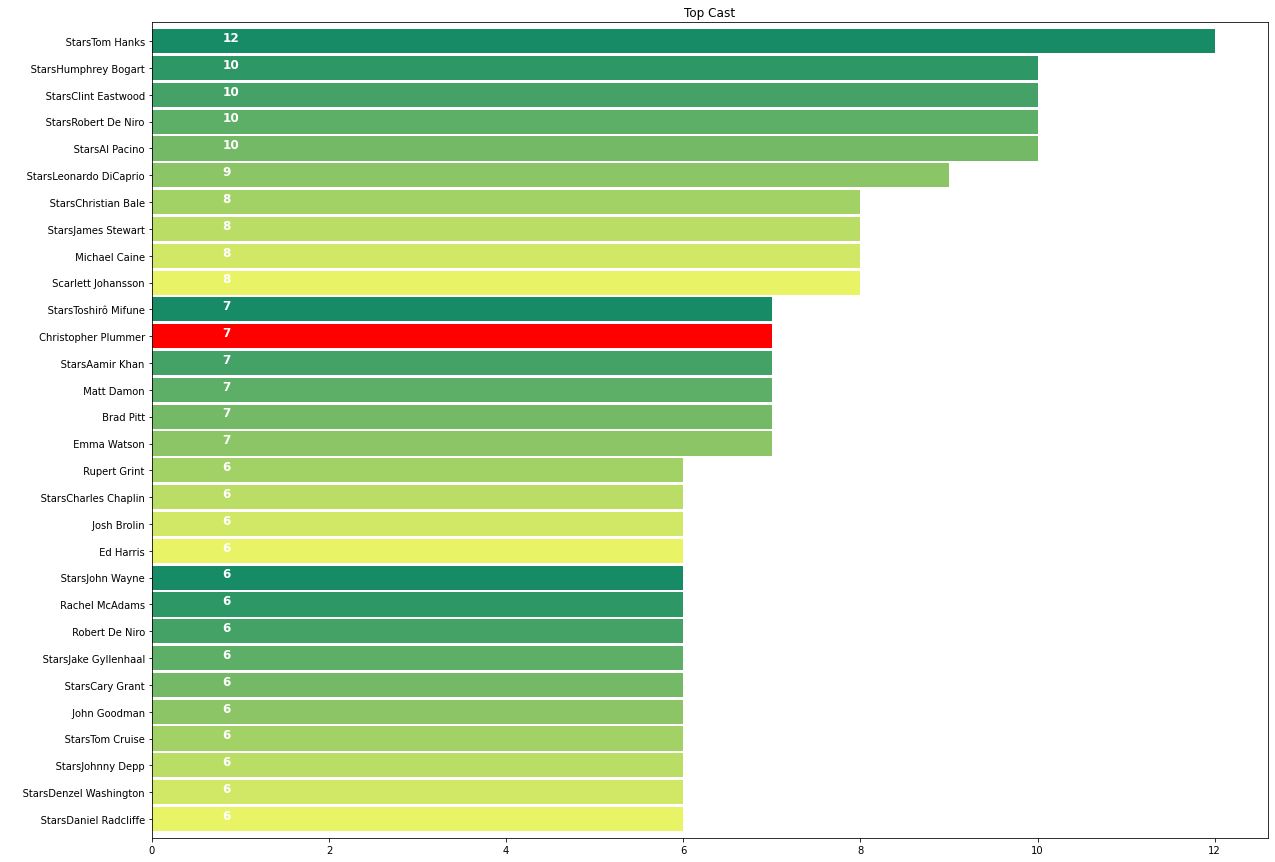

In [62]:
movies_data['cast']=movies_data['cast'].str.strip('[]').str.replace("'",'')
movies_data['cast']=movies_data['cast'].str.split(',')
plt.subplots(figsize=(20,15))
list1=[]
for i in movies_data['cast']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:30].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('summer_r',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:30].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
ax.patches[18].set_facecolor('r')
plt.title('Top Cast')
plt.show()

In [63]:
movies_data['year_release'].value_counts().nlargest(50)

2004    33
2014    30
2016    29
2009    29
2013    28
2001    27
2019    26
2007    26
2015    24
2012    24
2006    24
2017    23
1993    22
2003    21
2010    21
1997    20
2008    20
1995    19
2000    19
2018    19
2011    18
2002    18
1998    17
2005    16
1999    16
1962    13
1994    13
1991    12
1979    12
1973    12
1992    12
1960    11
1987    11
1982    11
1988    11
1986    10
1989    10
1967    10
1985     9
1971     9
1996     9
1957     9
1975     9
1984     9
1980     8
1968     8
1972     8
1964     8
1990     8
2020     8
Name: year_release, dtype: int64

# Year with more gross

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


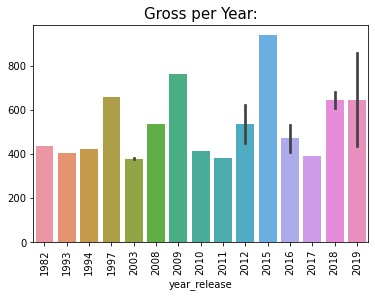

In [64]:
y = movies_data['gross'].nlargest(20).values
x = movies_data['year_release'].head(20)
sns.barplot(x,y)
plt.rcParams['figure.figsize'] = (20,10)
plt.xticks(rotation = 90)
plt.title('Gross per Year:',fontsize=15)
plt.show()

# Movies Released in a paticular Year

In [65]:
movies_data[movies_data['year_release'] == 2021]

,movie_names,directors,cast,year_release,duration_of_movies,gross,certificate,rating_for_movies,votes,genre,matascore
337,Shang-Chi and the Legend of the Ten Rings,[Destin Daniel Cretton],"[ StarsSimu Liu, Awkwafina, Tony Chiu-Wa...",2021,132,0.0,[UA],8.0,68517,"Action, Adventure, Fantasy",71
11,Shershaah,[Vishnuvardhan],"[ StarsSidharth Malhotra, Kiara Advani, ...",2021,135,0.0,[UA],8.8,99350,"Action, Biography, Drama",0
22,Drishyam 2,[Jeethu Joseph],"[ StarsMohanlal, Meena, Ansiba, Esther ...",2021,152,0.0,[13],8.6,30620,"Crime, Drama, Thriller",0
230,Zack Snyder's Justice League,[Zack Snyder],"[ StarsHenry Cavill, Ben Affleck, Gal Ga...",2021,242,0.0,[18],8.1,334857,"Action, Adventure, Fantasy",54
730,The Mitchells vs the Machines,[Michael Rianda],"[ StarsAbbi Jacobson, Danny McBride, May...",2021,113,0.0,[13],7.7,74780,"Animation, Adventure, Comedy",80


# Different Genre in the movies of data

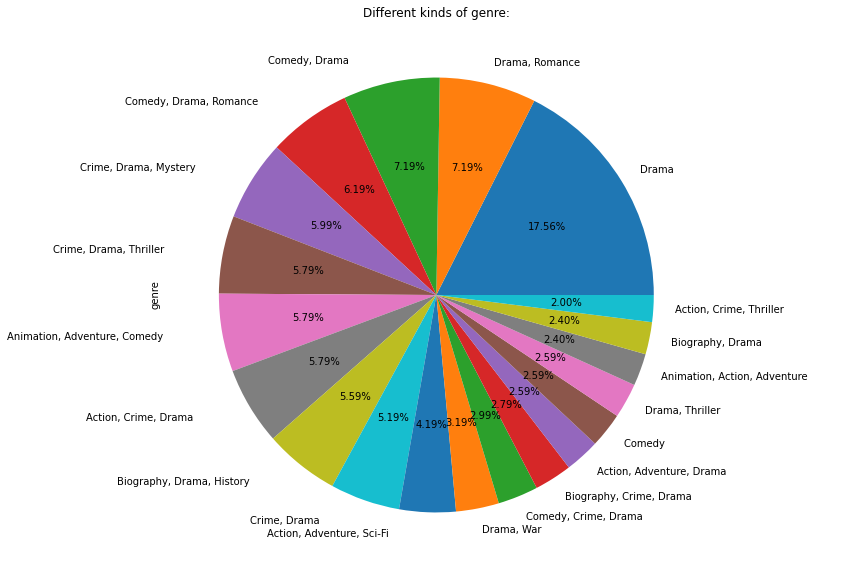

In [66]:
plt.figure(figsize=(30,10))
movies_data['genre'].value_counts().nlargest(20).plot.pie(autopct='%.2f%%')
plt.title('Different kinds of genre:')
plt.show()

# Censor Certificate of Movies

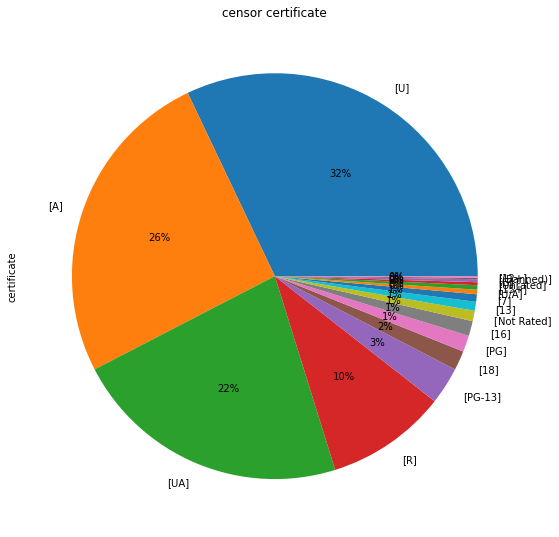

In [67]:
plt.subplot(1,2,2)
movies_data['certificate'].value_counts().nlargest(20).plot.pie(autopct = "%1.0f%%")
plt.title('censor certificate')
plt.show()

# Heatmap of Movies data

<AxesSubplot:>

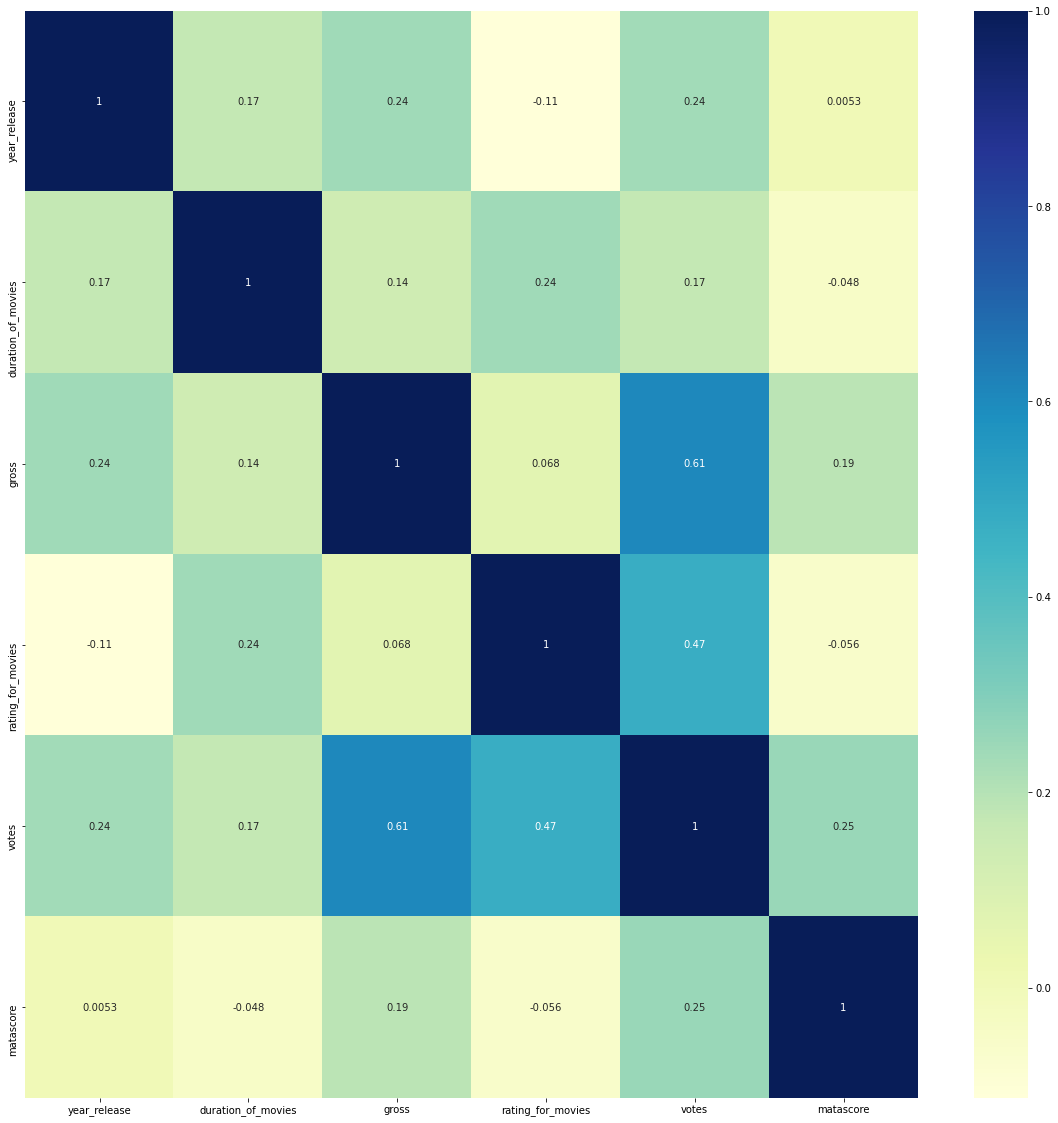

In [68]:
ig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(movies_data.corr(), annot=True, cmap="YlGnBu", ax=ax)

# No of Movies in Each Genre

In [69]:
movies_data['genre'].value_counts().nlargest(10)

Drama                                       88
Drama, Romance                              36
Comedy, Drama                               36
Comedy, Drama, Romance                      31
Crime, Drama, Mystery                       30
Crime, Drama, Thriller                      29
Animation, Adventure, Comedy                29
Action, Crime, Drama                        29
Biography, Drama, History                   28
Crime, Drama                                26
Name: genre, dtype: int64

In [70]:
movies_data[movies_data['year_release'] == 2002]

,movie_names,directors,cast,year_release,duration_of_movies,gross,certificate,rating_for_movies,votes,genre,matascore
16,The Lord of the Rings: The Two Towers,[Peter Jackson],"[ StarsElijah Wood, Ian McKellen, Viggo ...",2002,179,342.55,[UA],8.7,1543520,"Action, Adventure, Drama",87
251,Catch Me If You Can,[Steven Spielberg],"[ StarsLeonardo DiCaprio, Tom Hanks, Chr...",2002,141,164.62,[A],8.1,883634,"Biography, Crime, Drama",75
959,Minority Report,[Steven Spielberg],"[ StarsTom Cruise, Colin Farrell, Samant...",2002,145,132.07,[A],7.6,525880,"Action, Crime, Mystery",80
524,The Bourne Identity,[Doug Liman],"[ StarsFranka Potente, Matt Damon, Chris...",2002,119,121.66,[UA],7.9,523349,"Action, Mystery, Thriller",68
804,Road to Perdition,[Sam Mendes],"[ StarsTom Hanks, Tyler Hoechlin, Rob Ma...",2002,117,104.45,[A],7.7,256625,"Crime, Drama, Thriller",72
808,The Count of Monte Cristo,[Kevin Reynolds],"[ StarsJim Caviezel, Guy Pearce, Christo...",2002,131,54.23,[PG-13],7.7,132904,"Action, Adventure, Drama",61
519,Ying xiong,[Yimou Zhang],"[ StarsJet Li, Tony Chiu-Wai Leung, Magg...",2002,120,53.71,[UA],7.9,177423,"Action, Adventure, History",85
40,The Pianist,[Roman Polanski],"[ StarsAdrien Brody, Thomas Kretschmann, ...",2002,150,32.57,[13],8.5,769087,"Biography, Drama, Music",85
802,Adaptation.,[Spike Jonze],"[ StarsNicolas Cage, Meryl Streep, Chris...",2002,115,22.25,[R],7.7,185905,"Comedy, Drama",83
801,In America,[Jim Sheridan],"[ StarsPaddy Considine, Samantha Morton, ...",2002,105,15.54,[PG-13],7.7,42432,Drama,76


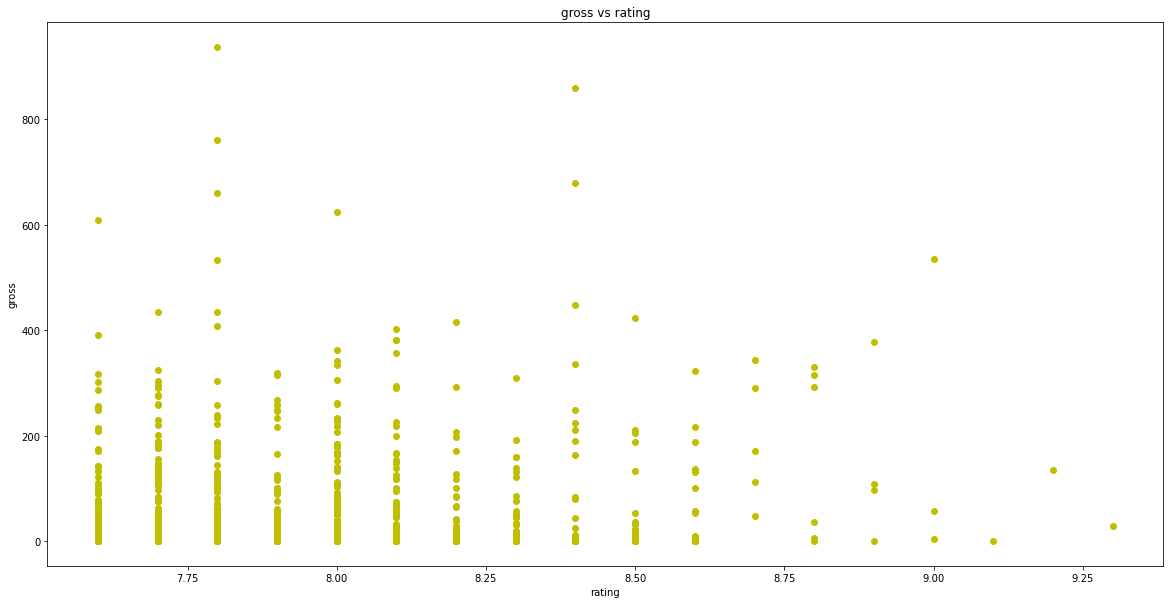

In [71]:
plt.scatter(movies_data['rating_for_movies'],movies_data['gross'],color='y')
plt.title('gross vs rating')
plt.ylabel('gross')
plt.xlabel('rating')
plt.show()

In [ ]:
Observations
 All the Observations are with help reference or Analysis done on Imdb Website with web Scraping

1) Tom Hanks is the actor acted in more movies in above data

2) Star Wars: Episode VII - The Force Awakens' s the highest gross movie

3) The Shawshank Redemption is the movie which recived highest votes and high rating in the data and it is release in the year 1994

4) Alfred Hitchcock directed 12 movies are in imdb top 1000 movies

5) Below id Data of no of movies in each genre
Drama                                       89
Drama, Romance                              36
Comedy, Drama                               36
Comedy, Drama, Romance                      31
Crime, Drama, Mystery                       30
Animation, Adventure, Comedy                29
Crime, Drama, Thriller                      29
Action, Crime, Drama                        29
Biography, Drama, History                   28
Crime, Drama                                26